In [76]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

In [77]:
data = yf.download("DOGE-USD", start="2021-03-24", end="2022-03-24")

[*********************100%***********************]  1 of 1 completed


In [78]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-24,0.053528,0.056494,0.051242,0.051702,0.051702,934537959
2021-03-25,0.051699,0.052407,0.049697,0.051448,0.051448,1084214116
2021-03-26,0.051433,0.054028,0.051331,0.053952,0.053952,776280028
2021-03-27,0.053940,0.055435,0.053528,0.054377,0.054377,753844053
2021-03-28,0.054381,0.054752,0.053013,0.053698,0.053698,460472975


In [79]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-20,0.123579,0.123919,0.117991,0.119154,0.119154,428111799
2022-03-21,0.119146,0.121332,0.118306,0.119339,0.119339,439486516
2022-03-22,0.119333,0.125350,0.119014,0.122481,0.122481,610507111
2022-03-23,0.122487,0.130713,0.121361,0.129727,0.129727,998922753
2022-03-24,0.129722,0.140605,0.128455,0.136550,0.136550,2017926806


In [80]:
S = data['Adj Close'][-1]
print('The spot price is', round(S,2))

The spot price is 0.14


In [81]:
ADJ =  data['Adj Close']

array([<AxesSubplot:xlabel='Date'>], dtype=object)

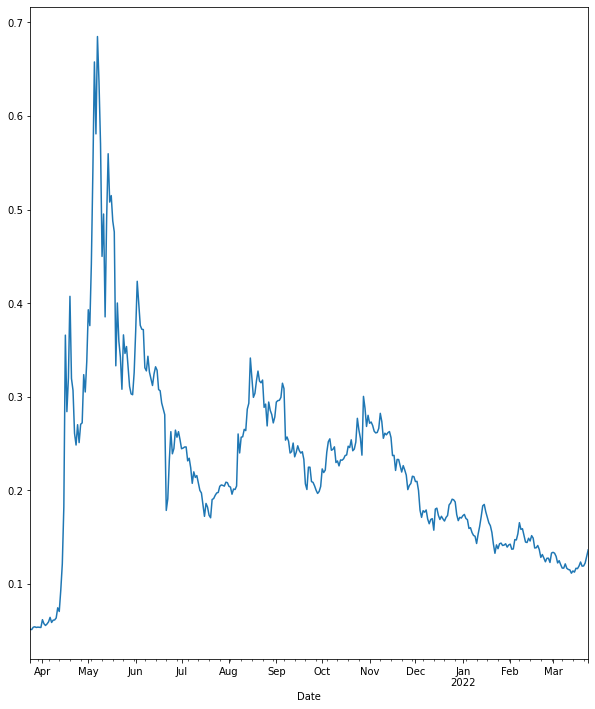

In [82]:
ADJ.plot(figsize=(10, 12), subplots=True)

In [83]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

# Annualised Volatility

In [84]:
vol = np.sqrt(365) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 166.56 %


# BSM European option

In [161]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [162]:
euro_option_bsm(0.14, 0.145, 2/52, 0.0156, 0, 1.66, 'put')

0.020979288170063254

In [174]:
S = np.linspace(0.1, 1, 11)
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Put [i] = euro_option_bsm(S[i],0.145, 2/52, 0.0156, 0, 1.66, 'put')

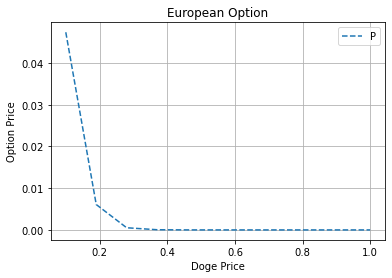

In [176]:
fig = plt.figure()
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Doge Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend('Put')

Text(0.5, 1.0, 'Doge Simulation')

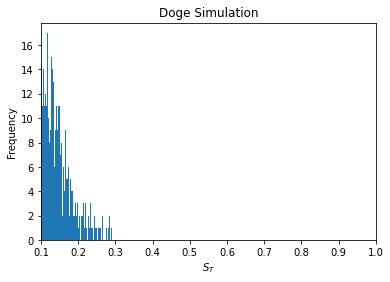

In [198]:
S=0.14 # spot price
K=0.145 # strike
T=2/52 # maturity 
r=0.0156 # risk free rate 
sigma=1.66  # annualized volatility
Ndraws = 1000


np.random.seed(0)
dS = np.random.normal((r - sigma**2/2)*T , sigma*np.sqrt(T), size=Ndraws)
ST = S0 * np.exp(dS)


n, bins, patches = plt.hist(ST,bins=250);
plt.xlabel('$S_T$')
plt.xlim([0.1,1])
plt.ylabel('Frequency')
plt.title('Doge Simulation')

The Option was in the money  375 times
Out of 1000 simulations
Probability of being in the money 0.375%


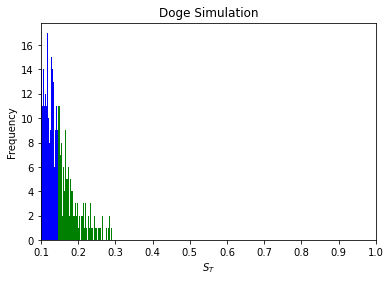

In [199]:
n, bins, patches = plt.hist(ST,bins=250);
plt.xlabel('$S_T$')
plt.xlim([0.1,1])
plt.ylabel('Frequency')
plt.title('Doge Simulation')
for c, p in zip(bins, patches):
    if c > K:
        plt.setp(p, 'facecolor', 'green')
    else:
        plt.setp(p, 'facecolor', 'blue')


timesInMoney = len(ST[ST>K])

P = timesInMoney/Ndraws
print('The Option was in the money ', f'{timesInMoney} times')
print(f'Out of {Ndraws} simulations')
print(f'Probability of being in the money {P}%')

# Binary options

In [191]:
cp = (S[-1,:]  - K)>0
bpc = np.mean(np.maximum(cp.astype(int),0))
print('Binary call', str(bpc))

Binary call 0.0


In [192]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Binary put', str(bpp))

Binary put 1.0


In [193]:
bpc + bpp

1.0

# Binomial Tree

In [206]:
S0 = 0.14              # spot stock price
K = 0.145              # strike
T = 2/52               # maturity 
r = 0.0156              # risk free rate 
sig = 1.66             # diffusion coefficient or volatility
N = 2                  # number of periods or number of time steps  
payoff = "put"         # payoff 

In [207]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))               # up factor
d = 1.0 / u                                   # down factor 

In [208]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [209]:
S

array([[0.14      , 0.17623935, 0.22185934],
       [0.        , 0.11121239, 0.14      ],
       [0.        , 0.        , 0.08834426]])

In [210]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.44334864089293513

In [211]:
payoff = "put" 

In [212]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.005     ],
       [0.        , 0.        , 0.05665574]])

In [215]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.02001128, 0.00278242, 0.        ],
       [0.        , 0.03374411, 0.005     ],
       [0.        , 0.        , 0.05665574]])

In [216]:
print('European ' + payoff, str( V[0,0]))


European put 0.02001128425901281


# Monto Carlo Simulation

In [221]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [222]:
T = 2/52
r = 0.0156
sigma = 1.66
S0 = 0.14
K = 0.145

In [225]:
S = mcs_simulation_np(10000)

In [227]:
S = np.transpose(S)
S


array([[0.14      , 0.14      , 0.14      , ..., 0.14      , 0.14      ,
        0.14      ],
       [0.14021739, 0.14040659, 0.13990864, ..., 0.13966485, 0.14037799,
        0.14089184],
       [0.14023816, 0.14039616, 0.1400505 , ..., 0.1389298 , 0.13970732,
        0.14090475],
       ...,
       [0.1436532 , 0.12691151, 0.06893521, ..., 0.08225869, 0.11164317,
        0.14442377],
       [0.14384996, 0.12641254, 0.06886152, ..., 0.08195566, 0.11165336,
        0.14476929],
       [0.14424432, 0.12716914, 0.06915883, ..., 0.08217914, 0.11162767,
        0.14432847]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

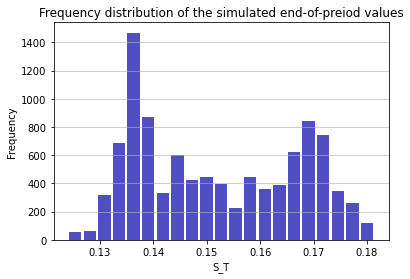

In [228]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [229]:
p = np.mean(np.maximum(K - S[:,-1],0)) * np.exp(-r * T)
print('European put', str(p))

European put 0.0033626424244104546


# Delta

In [101]:
def delta(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [230]:
d = delta(0.14, 0.145, 2/52, 0.0156, 0, 1.66, 'put')
print('The value of Delta is', d.round(4),'.','If the Doge price increase $ 1, then the value of the option will decrease $', d.round(4), '.')

The value of Delta is -0.4773 . If the Doge price increase $ 1, then the value of the option will decrease $ -0.4773 .


In [142]:
S = np.linspace(0.1, 1, 11)
T = np.linspace(1/52, 1/12, 11)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 0.145, T[i], 0.0156, 0, 1.66, 'put')

C:\Users\zafa1\AppData\Local\Temp/ipykernel_13236/1226907743.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


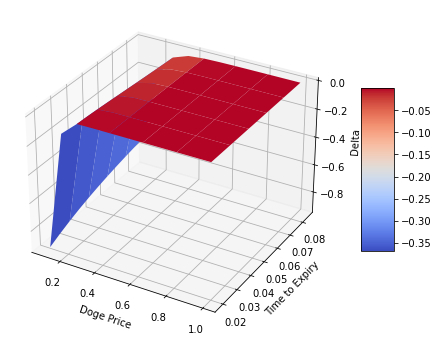

In [143]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Doge Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Gamma

In [105]:
def gamma(S, K, T, r, q, sig, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (sig * S * np.sqrt(T))
    
    return gamma

In [144]:
gamma(0.14, 0.145, 2/52, 0.0156, 0 , 1.66 ,'put')

8.738951320296966

In [146]:
S = np.linspace(0.1, 1, 11)
T = np.linspace(1/52, 1/12, 11)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 0.145, T[i], 0.0156, 0, 1.66, 'put')

C:\Users\zafa1\AppData\Local\Temp/ipykernel_13236/3071456620.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


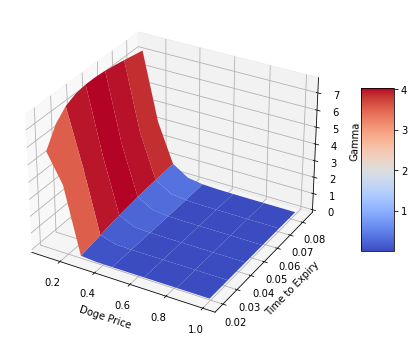

In [147]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Doge Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Theta

In [149]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [150]:
theta(0.14, 0.145, 2/52, 0.0156, 0 , 1.66 ,'put')

0.2373641203311447

In [151]:
S = np.linspace(0.1, 1, 11)
T = np.linspace(1/52, 1/12, 11)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 0.145, T[i], 0.0156, 0, 1.66, 'put')

C:\Users\zafa1\AppData\Local\Temp/ipykernel_13236/3443797099.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


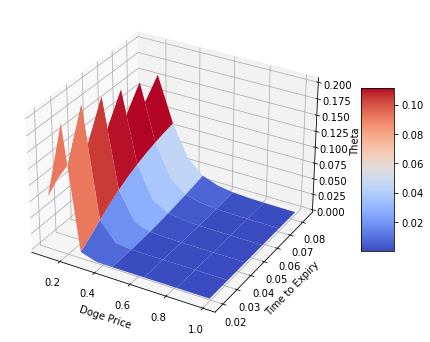

In [152]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Doge Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Rho

In [130]:
def rho(S, K, T, r, q, sig, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [153]:
rho(0.14, 0.145, 2/52, 0.0156, 0 , 1.66 ,'put')

-0.0033771908300875945

In [154]:
S = np.linspace(0.1, 1, 11)
T = np.linspace(1/52, 1/12, 11)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 0.145, T[i], 0.0156, 0, 1.66, 'put')

C:\Users\zafa1\AppData\Local\Temp/ipykernel_13236/2743028563.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


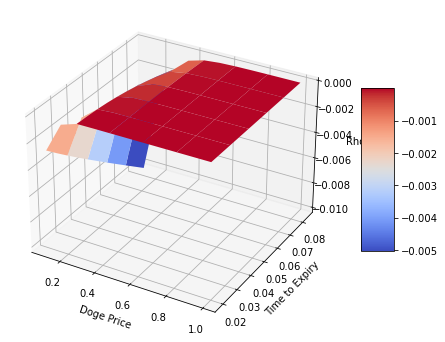

In [155]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Doge Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Vega

In [135]:
def vega(S, K, T, r, q, sig, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [156]:
vega(0.14, 0.145, 2/52, 0.0156, 0 , 1.66 ,'put')


0.0109357892368147

In [158]:
S = np.linspace(0.1, 1, 11)
T = np.linspace(1/52, 1/12, 11)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 0.145, T[i], 0.0156, 0, 1.66, 'put')

C:\Users\zafa1\AppData\Local\Temp/ipykernel_13236/106476360.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


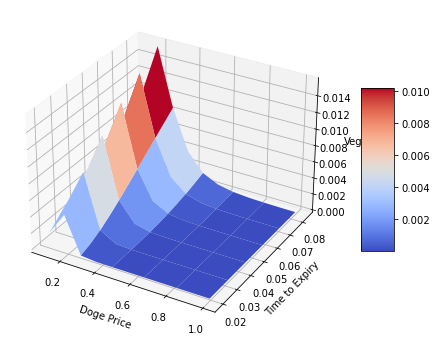

In [159]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Doge Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [160]:
v = vega(0.14, 0.145, 2/52, 0.0156, 0 , 1.66 ,'put')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 0.0109 . If the volatility increases 1%, then the value of the option will increase $ 0.000109 .
